# Model Sequance

1. StandardScaler : Standardize features by removing the mean and scaling to unit variance
2. SMOTE
3. XGBoost, Logistic regression, Random Forest
4. Performance Metrics : Recall, Accuracy, Precision
5. SHAP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb
from xgboost import XGBClassifier

# 0. Data Importation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/RBS/Capstone/Dataset/ml_case_training_data.csv')

In [ ]:
price_df = pd.read_csv('/content/drive/MyDrive/RBS/Capstone/Dataset/ml_case_training_hist_data.csv')

In [ ]:
churn_df = pd.read_csv('/content/drive/MyDrive/RBS/Capstone/Dataset/ml_case_training_output.csv')

In [ ]:
customer_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [ ]:
price_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
churn_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


# Preparation for Data Analysis

In [ ]:
analysis_df = pd.merge(customer_df, churn_df, on=['id'])

In [ ]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [ ]:
analysis_df.isna().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [ ]:
# Dropping the irrelavent string values and columns that are missing over 70% of data
analysis_df.drop(['campaign_disc_ele', 'channel_sales',
                  'activity_new', 'origin_up', 'date_first_activ',
                  'forecast_base_bill_ele', 'forecast_base_bill_year',
                  'forecast_bill_12m', 'forecast_cons'], axis=1, inplace=True)

In [ ]:
analysis_df.isna().sum()

id                            0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
pow_max                       3
churn                         0
dtype: int64

In [ ]:
analysis_df['has_gas'] = analysis_df['has_gas'].replace({'f': 0, 't': 1})

In [ ]:
analysis_df = analysis_df.fillna(analysis_df.mean())

<ipython-input-9-4e2954e02779>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  analysis_df = analysis_df.fillna(analysis_df.mean())


In [ ]:
analysis_df['date_modif_prod'] = analysis_df['date_modif_prod'].bfill()
analysis_df['date_renewal'] = analysis_df['date_renewal'].bfill()
analysis_df['date_end'] = analysis_df['date_end'].bfill()

In [ ]:
analysis_df.isna().sum()

id                          0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
churn                       0
dtype: int64

In [ ]:
analysis_df.shape[0]

16096

# Exploratory Data Analysis

In [ ]:
# Get the names of all columns
column_names = analysis_df.columns

# Convert the Index object to a list if needed
column_names_list = column_names.tolist()

# Print or use the column names
print(column_names_list)

['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']


In [ ]:
churn_rate = analysis_df.groupby('churn').size().reset_index(name='Count')
total_count = churn_rate['Count'].sum()
churn_rate['TotalCount'] = total_count
churn_rate['Percentage'] = round(churn_rate['Count'] / total_count * 100)

<ipython-input-23-ead736017915>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='churn', y='Percentage', data=churn_rate, palette='muted')


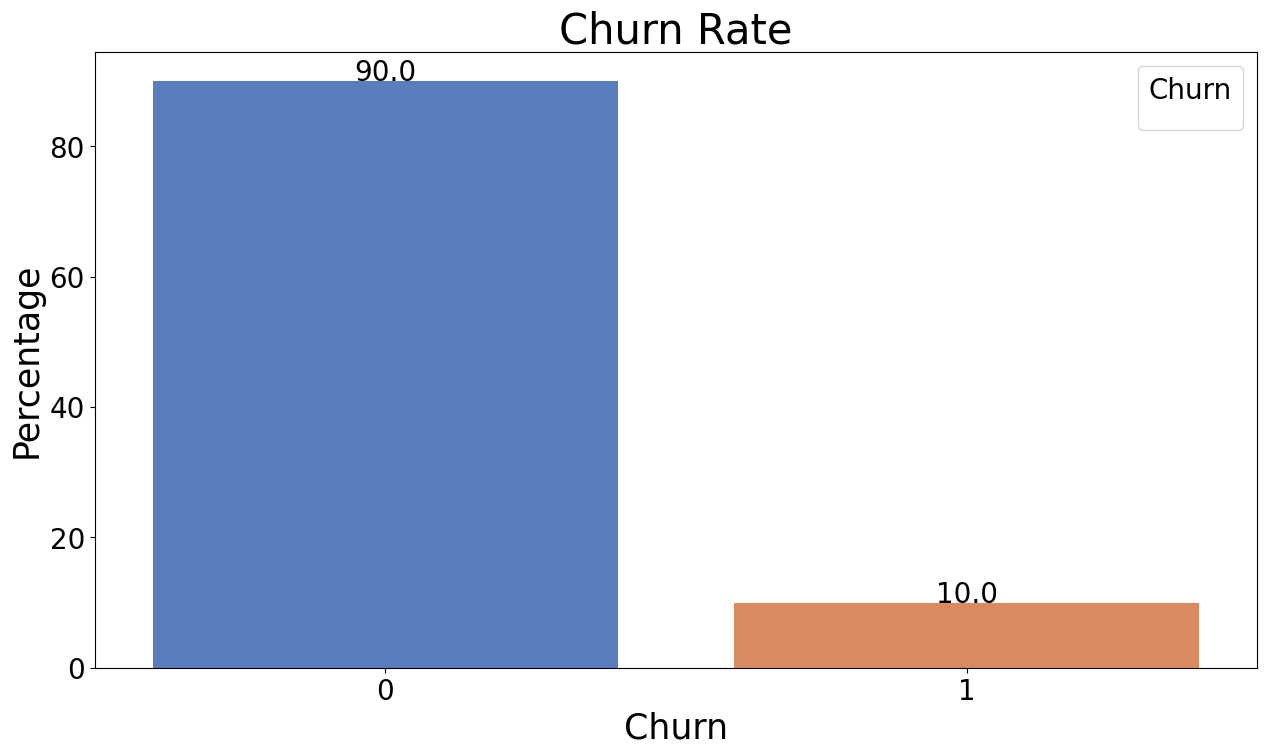

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'churn_rate' is a pandas DataFrame with columns 'churn' and 'Percentage'
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x='churn', y='Percentage', data=churn_rate, palette='muted')

# Adding the text labels on the bars
for index, row in churn_rate.iterrows():
    barplot.text(row.name, row.Percentage, round(row.Percentage, 2), color='black', ha="center", size=20)

plt.title('Churn Rate', fontsize=30)
plt.xlabel('Churn', fontsize=25)
plt.ylabel('Percentage', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Churn', title_fontsize=20, fontsize=20)
plt.show()

In [ ]:
analysis_df.corr()

<ipython-input-24-b5506684ecb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  analysis_df.corr()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.471233,0.919545,0.165168,0.139526,-0.043551,0.085996,-0.033425,0.146229,-0.025326,0.229761,0.139353,-0.065184,-0.045558,0.308567,0.119910,0.008810,0.102422,-0.051759
cons_gas_12m,0.471233,1.000000,0.447209,0.059525,0.057619,-0.014407,0.040327,-0.021608,0.075628,-0.026212,0.372771,0.060609,-0.016866,-0.008242,0.272005,0.058928,-0.008626,0.052365,-0.040880
cons_last_month,0.919545,0.447209,1.000000,0.129574,0.151476,-0.037699,0.076066,-0.024195,0.122922,-0.020017,0.202702,0.153861,-0.054069,-0.037665,0.350711,0.096343,0.004860,0.089565,-0.046931
forecast_cons_12m,0.165168,0.059525,0.129574,1.000000,0.746076,0.014759,0.390550,-0.214928,0.243144,0.057530,0.062583,0.725550,-0.184120,-0.141596,0.013283,0.768609,0.064431,0.583098,0.007395
forecast_cons_year,0.139526,0.057619,0.151476,0.746076,1.000000,-0.008929,0.329201,-0.204421,0.223916,0.053256,0.038782,0.981732,-0.139138,-0.106546,0.013811,0.537545,0.066105,0.442225,0.002756
forecast_discount_energy,-0.043551,-0.014407,-0.037699,0.014759,-0.008929,1.000000,-0.019350,0.319202,0.049174,0.024477,0.005860,0.011294,0.198510,0.150511,0.055132,0.013423,-0.071420,-0.022107,0.012179
forecast_meter_rent_12m,0.085996,0.040327,0.076066,0.390550,0.329201,-0.019350,1.000000,-0.555331,0.632863,0.013514,0.037858,0.296259,-0.018953,0.000856,0.000050,0.336070,0.112271,0.600566,0.029971
forecast_price_energy_p1,-0.033425,-0.021608,-0.024195,-0.214928,-0.204421,0.319202,-0.555331,1.000000,-0.364849,0.389218,-0.026864,-0.163364,0.183813,0.029005,0.025841,-0.184191,-0.199077,-0.344541,-0.003293
forecast_price_energy_p2,0.146229,0.075628,0.122922,0.243144,0.223916,0.049174,0.632863,-0.364849,1.000000,-0.137244,0.064197,0.209404,0.063086,0.073783,0.025935,0.250382,0.102562,0.331251,0.025254
forecast_price_pow_p1,-0.025326,-0.026212,-0.020017,0.057530,0.053256,0.024477,0.013514,0.389218,-0.137244,1.000000,-0.045198,0.051112,-0.114243,-0.133695,-0.011410,-0.005481,-0.037790,0.051330,0.003980


<ipython-input-25-806299604cae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(analysis_df.corr(), vmin=-1, vmax=1, annot=True)


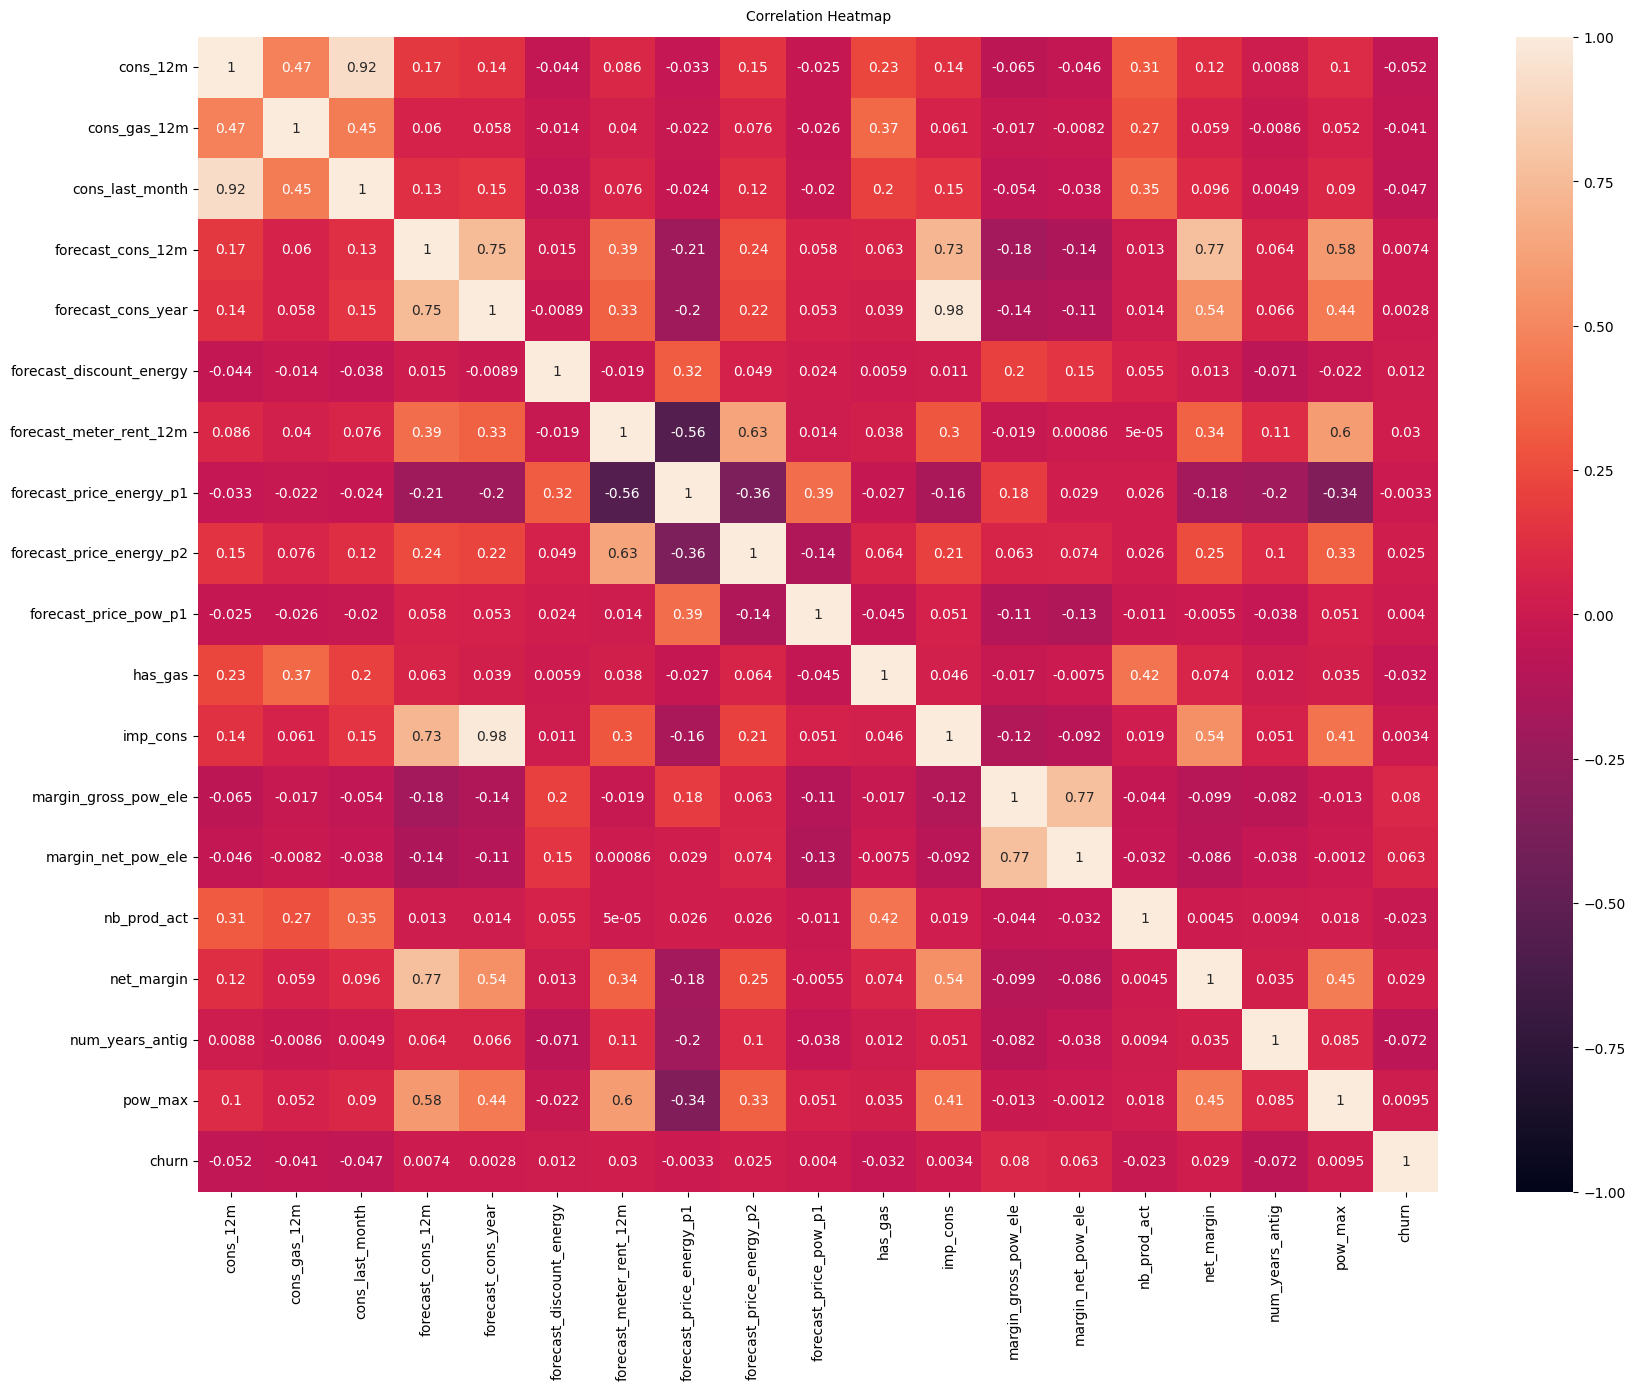

In [ ]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(analysis_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

<ipython-input-26-ec8c5eaee9a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(analysis_df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with Churn')

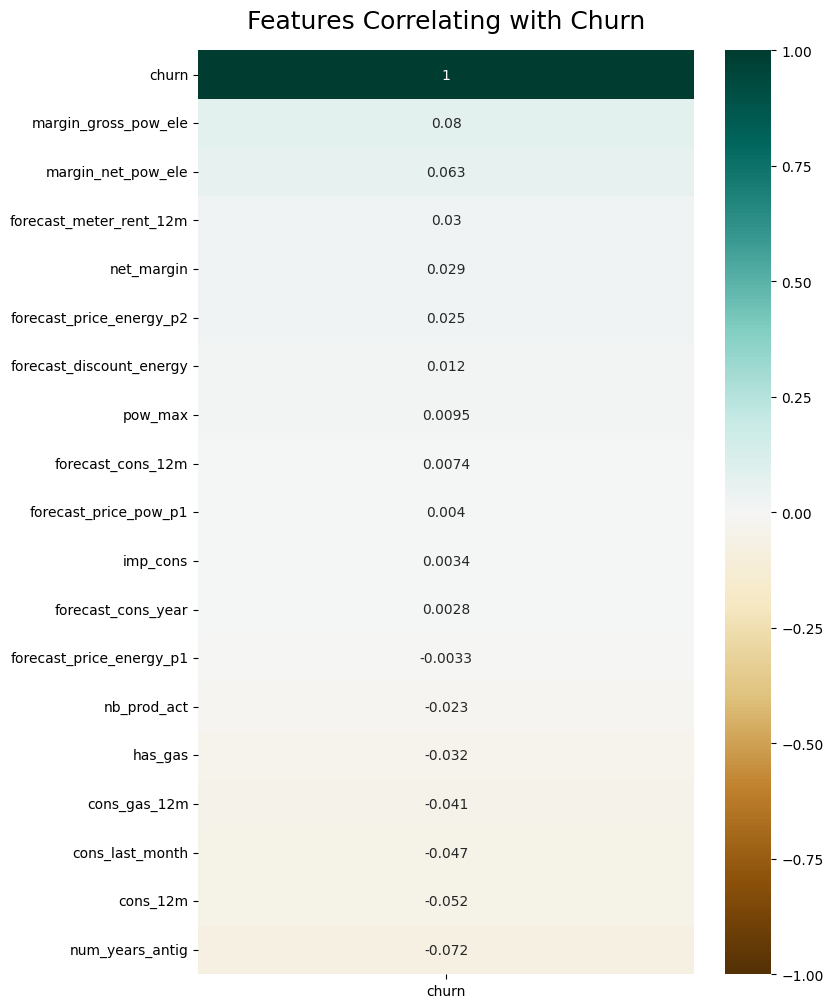

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(analysis_df.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16)

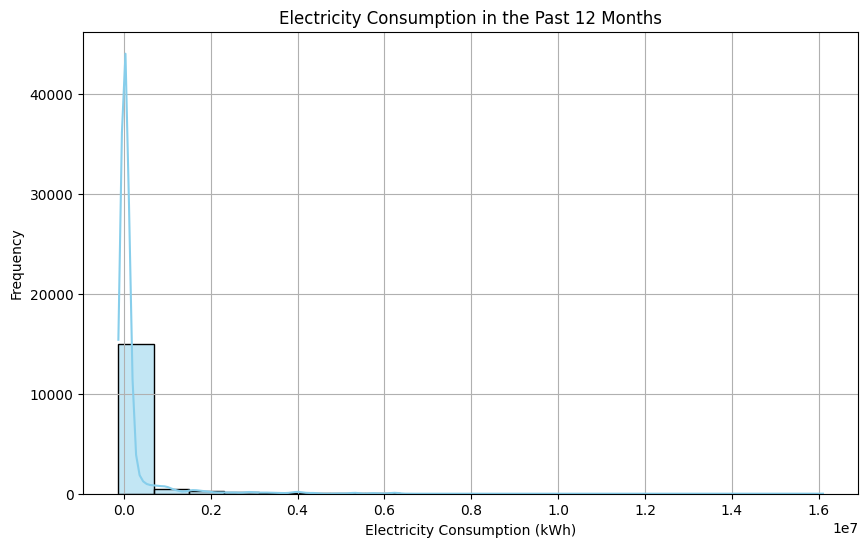

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(analysis_df['cons_12m'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Electricity Consumption in the Past 12 Months')
plt.xlabel('Electricity Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Assuming 'cons_12m' is a column in your DataFrame 'df'
corr_cons_12m = analysis_df['cons_12m'].corr(analysis_df['cons_12m'])  # Correlation of 'cons_12m' with itself (which will be 1.0)
median_cons_12m = analysis_df['cons_12m'].median()

print("Correlation of cons_12m:", corr_cons_12m)
print("Median of cons_12m:", median_cons_12m)

Correlation of cons_12m: 1.0
Median of cons_12m: 15332.5


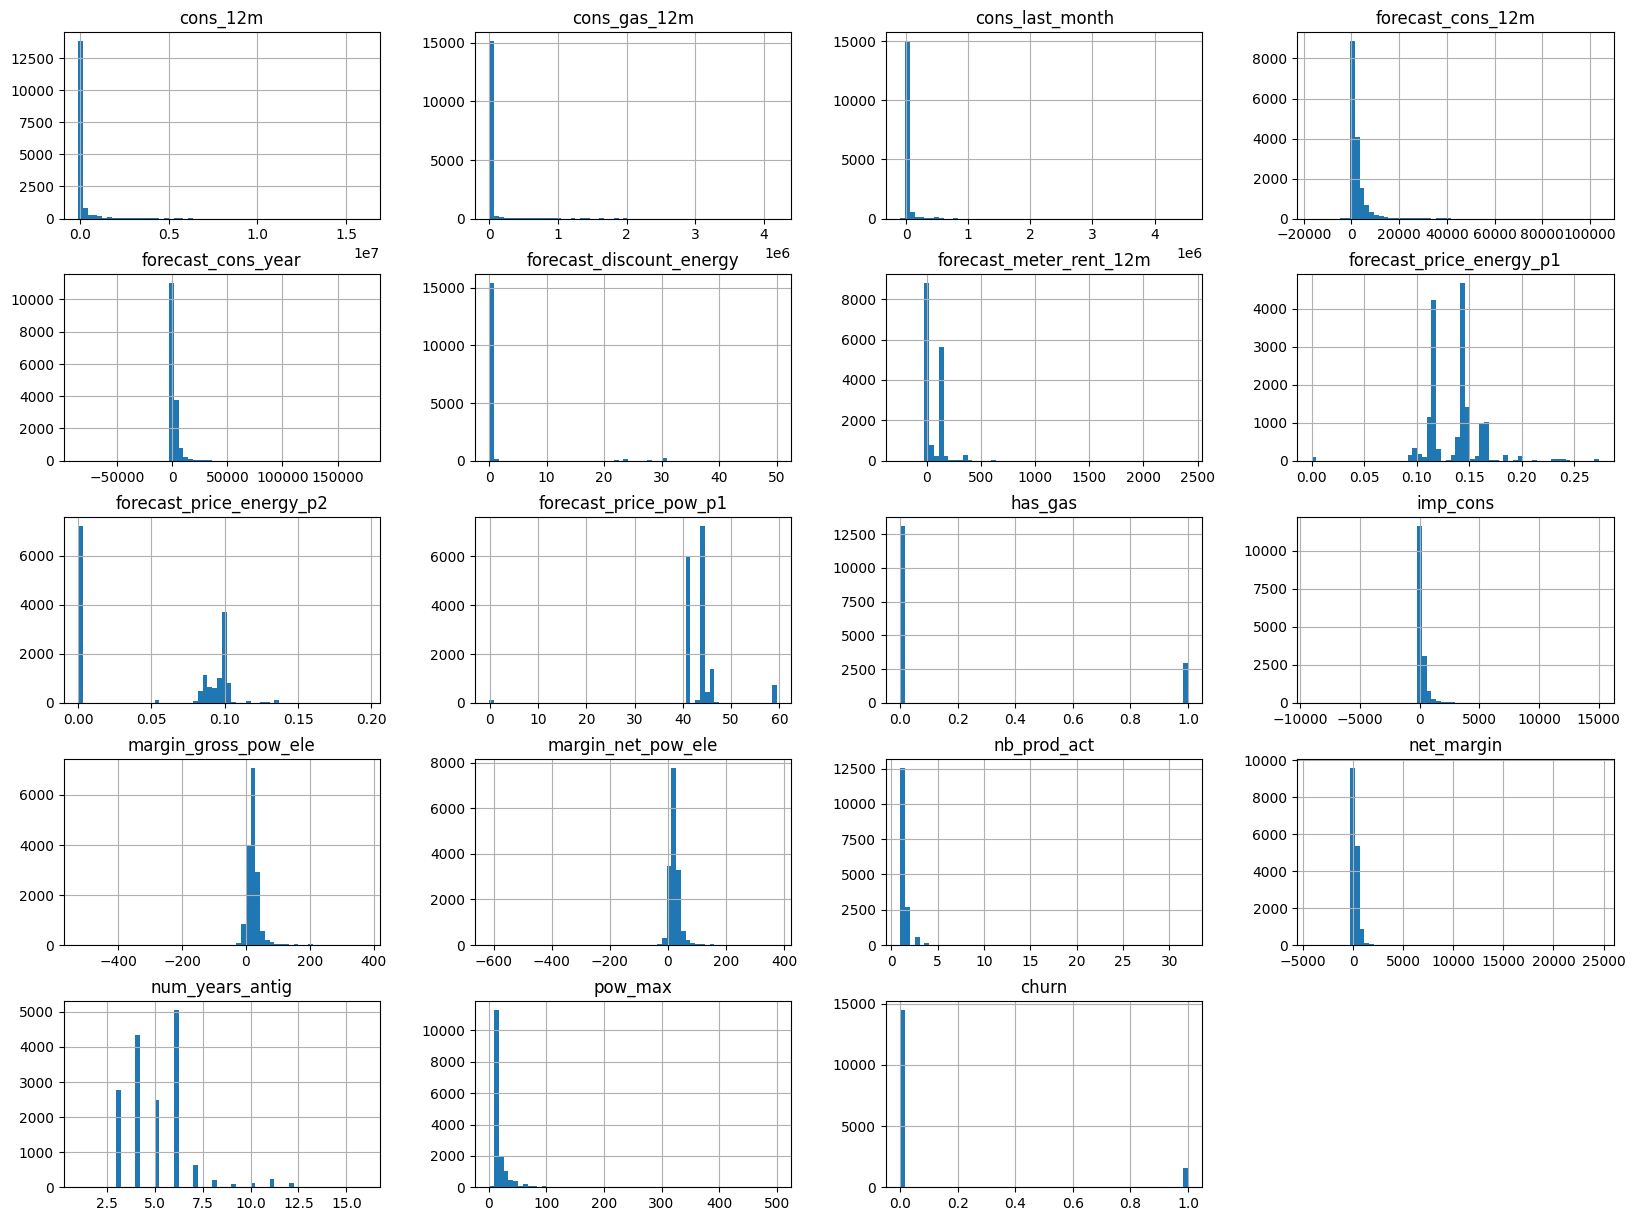

In [ ]:
analysis_df.hist(
    bins=60, figsize=(20,15)
)
plt.show()

In [ ]:
analysis_df['date_activ']=pd.to_datetime(analysis_df['date_activ'])
analysis_df['date_end']=pd.to_datetime(analysis_df['date_end'])
analysis_df['date_modif_prod']=pd.to_datetime(analysis_df['date_modif_prod'])
analysis_df['date_renewal']=pd.to_datetime(analysis_df['date_renewal'])

In [ ]:
analysis_df['CLV']=analysis_df['date_end']-analysis_df['date_activ']
analysis_df.CLV.describe()

count                           16096
mean     2018 days 02:50:41.749502976
std       627 days 06:02:20.509906568
min                 365 days 00:00:00
25%                1461 days 00:00:00
50%                1834 days 00:00:00
75%                2402 days 00:00:00
max                5925 days 00:00:00
Name: CLV, dtype: object

In [ ]:
def year(column):
    analysis_df[column+'_year'] = analysis_df[column].dt.year

year('date_activ')
year('date_end')
year('date_modif_prod')
year('date_renewal')

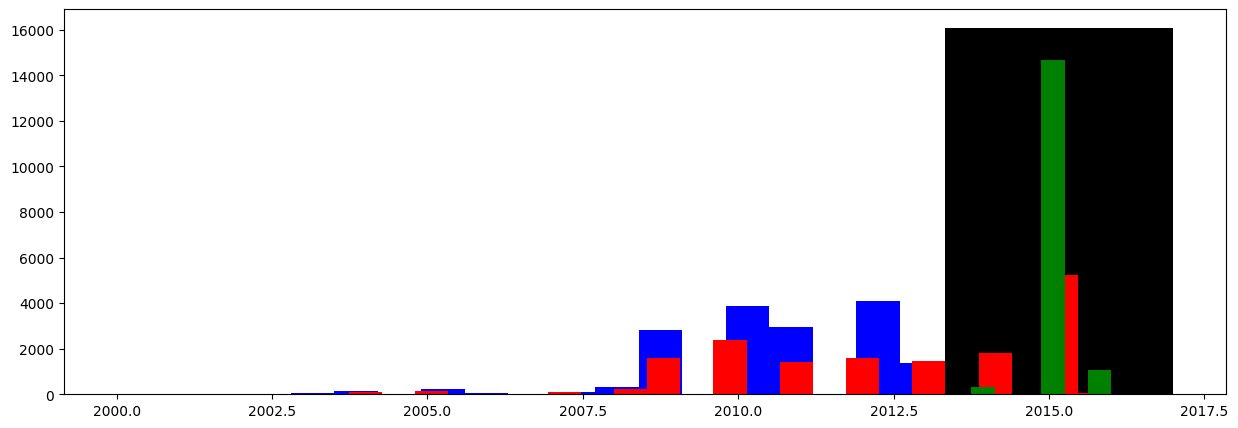

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax.hist(analysis_df['date_activ_year'],
        bins=20,color='blue')
ax.hist(analysis_df['date_end_year'],
        bins=3,color='black')
ax.hist(analysis_df['date_modif_prod_year'],
        bins=30,color='red')
ax.hist(analysis_df['date_renewal_year'],
        bins=8,color='green')
plt.show()

<Axes: ylabel='has_gas'>

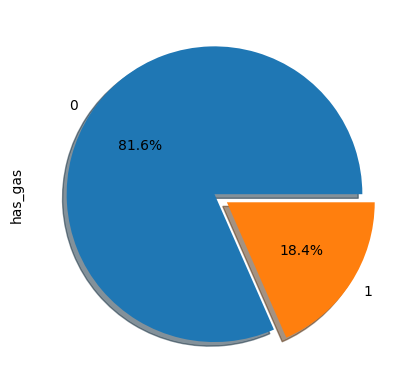

In [ ]:
analysis_df.has_gas.value_counts().plot(
    kind='pie',explode=(0,0.1),
    autopct='%1.1f%%',shadow=True
)

In [ ]:
analysis_df.groupby(['churn'])['has_gas'].value_counts()

churn  has_gas
0      0          11771
       1           2730
1      0           1361
       1            234
Name: has_gas, dtype: int64

In [ ]:
price_df.dropna()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [ ]:
price_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


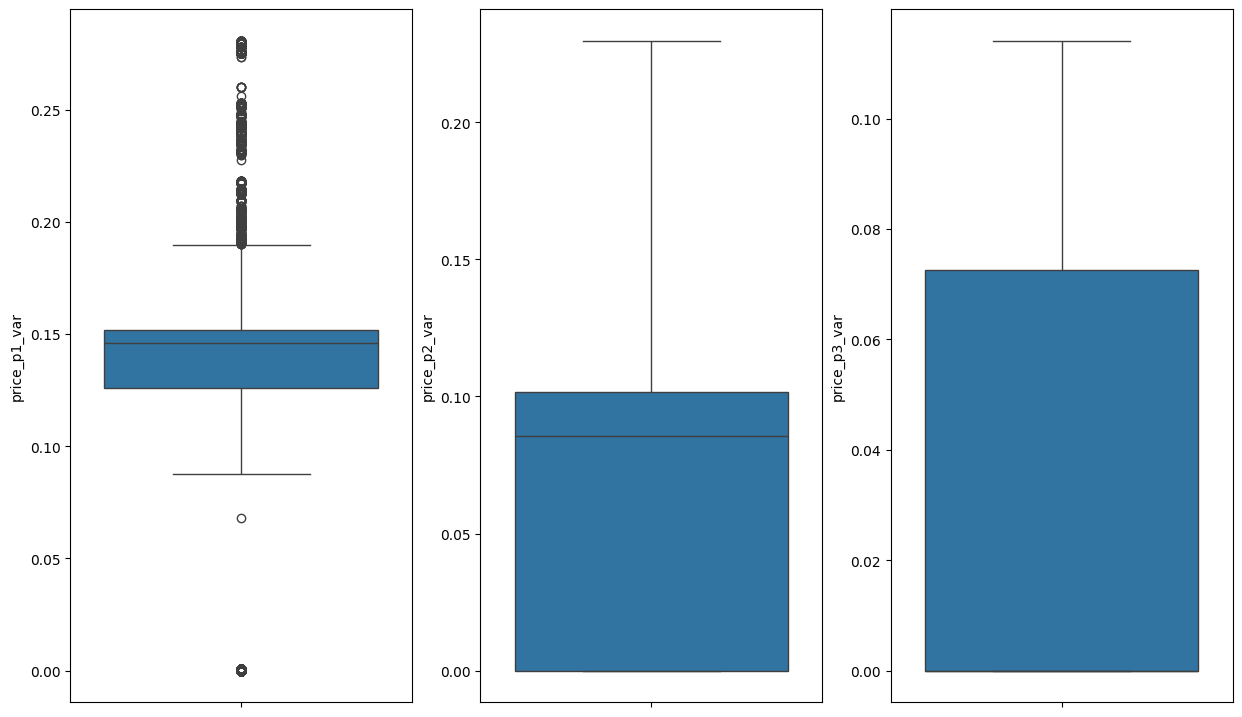

In [ ]:
plt.figure(figsize=(15,9))

plt.subplot(1,3,1)
sns.boxplot(price_df.price_p1_var)
plt.subplot(1,3,2)
sns.boxplot(price_df.price_p2_var)
plt.subplot(1,3,3)
sns.boxplot(price_df.price_p3_var)

plt.show()

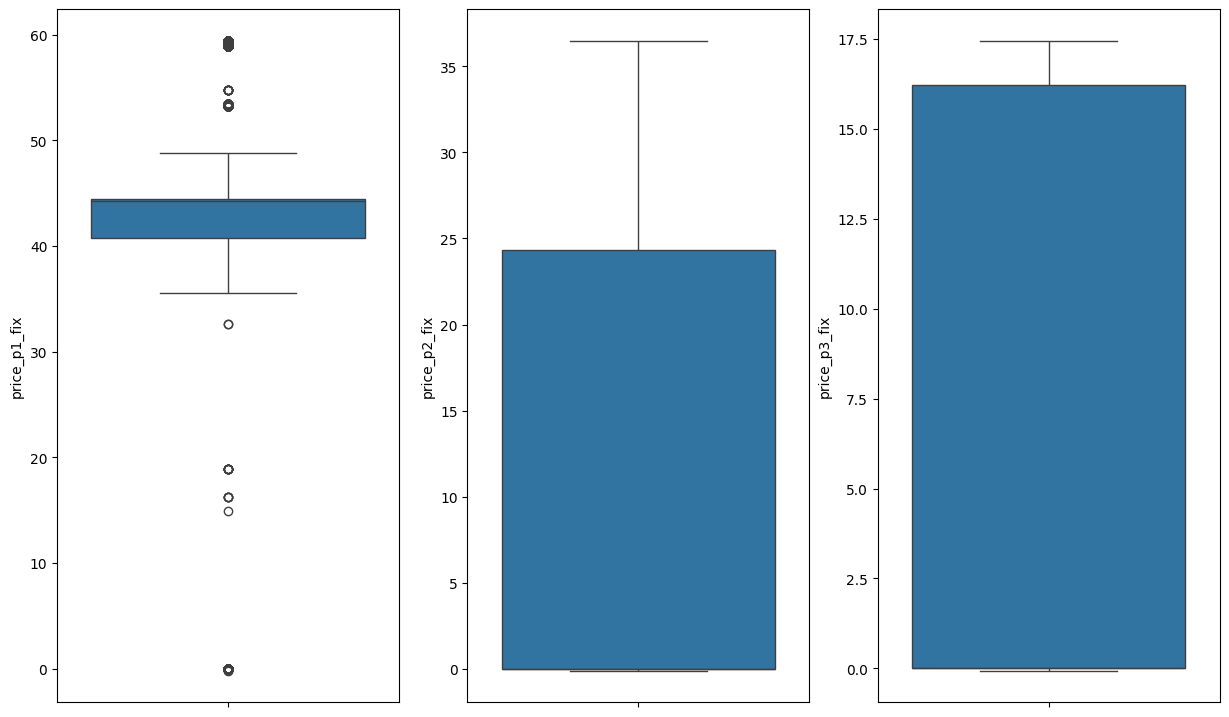

In [ ]:
plt.figure(figsize=(15,9))

plt.subplot(1,3,1)
sns.boxplot(price_df.price_p1_fix)
plt.subplot(1,3,2)
sns.boxplot(price_df.price_p2_fix)
plt.subplot(1,3,3)
sns.boxplot(price_df.price_p3_fix)

plt.show()

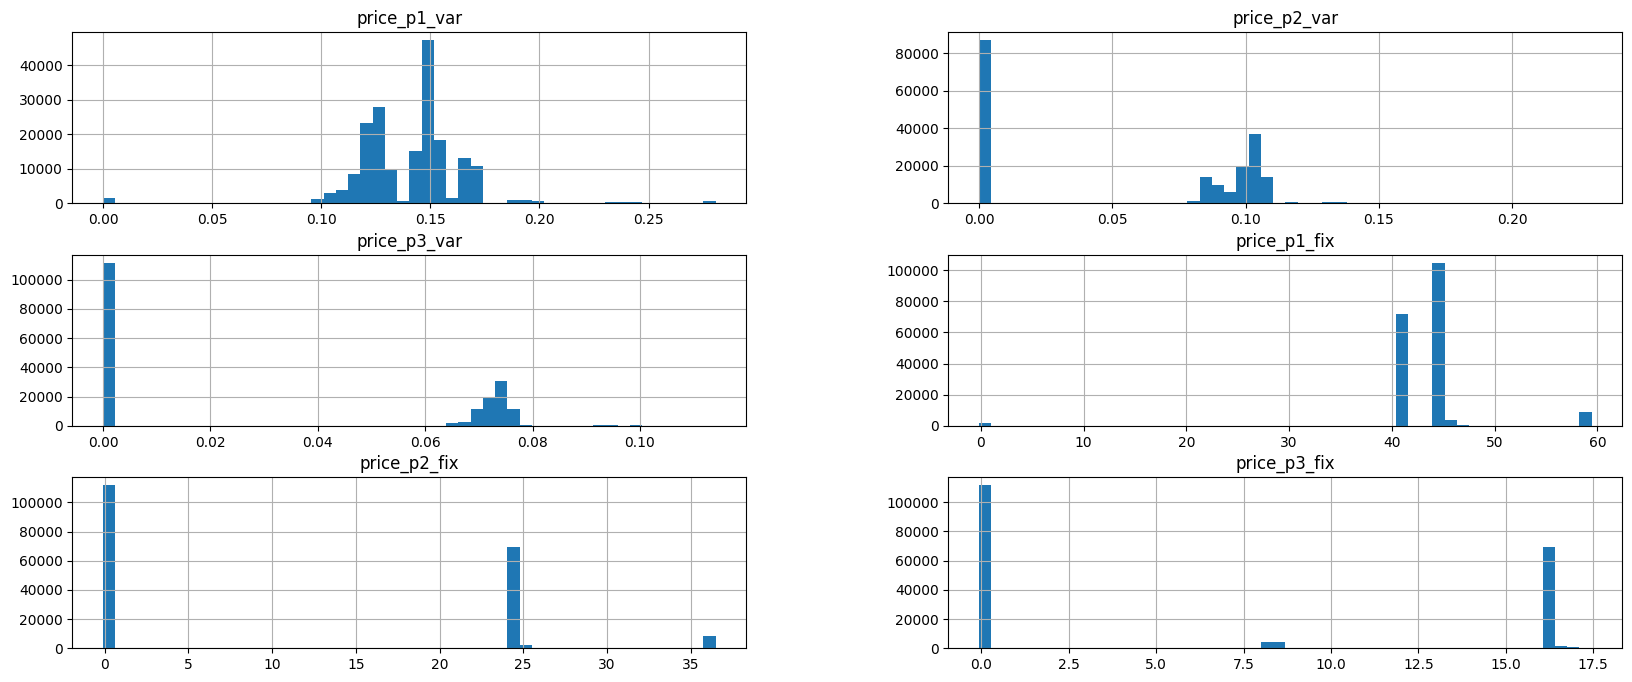

In [ ]:
price_df.hist(bins=50, figsize=(20,8))
plt.show()

In [ ]:
price_churn=pd.merge(price_df,churn_df, on=['id'])

In [ ]:
price_churn['churn'].value_counts()

0    173893
1     19109
Name: churn, dtype: int64

In [ ]:
price_churn[price_churn['churn']==1].describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,18931.000000,18931.000000,18931.000000,18931.000000,18931.000000,18931.000000,19109.0
mean,0.141279,0.058010,0.034937,43.459985,12.029976,7.387700,1.0
std,0.024439,0.050517,0.036983,4.144348,12.896629,7.939266,0.0
min,0.000000,0.000000,0.000000,-0.162916,-0.097752,-0.065172,1.0
25%,0.125165,0.000000,0.000000,40.728885,0.000000,0.000000,1.0
50%,0.144673,0.087970,0.000000,44.266930,0.000000,0.000000,1.0
75%,0.151367,0.103059,0.073433,44.444710,24.437330,16.226389,1.0
max,0.280700,0.169597,0.101037,59.444710,36.490689,16.958222,1.0


In [ ]:
price_churn[price_churn['churn']==0].describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,172712.000000,172712.000000,172712.000000,172712.000000,172712.000000,172712.000000,173893.0
mean,0.140960,0.054017,0.030249,43.310810,10.552225,6.353251,0.0
std,0.025191,0.049964,0.036234,5.561288,12.843232,7.758092,0.0
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.0
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.0
50%,0.146517,0.085058,0.000000,44.266930,0.000000,0.000000,0.0
75%,0.151635,0.101673,0.072394,44.444710,24.339581,16.226389,0.0
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,0.0


In [ ]:
analysis_df['net_margin'].sum()

3508719.2054225486

## Consumption Analysis

In [ ]:
analysis_df['cons_12m'].mean()

194804.38462972167

In [ ]:
analysis_df['cons_12m'].describe()

count    1.609600e+04
mean     1.948044e+05
std      6.795151e+05
min     -1.252760e+05
25%      5.906250e+03
50%      1.533250e+04
75%      5.022150e+04
max      1.609711e+07
Name: cons_12m, dtype: float64

In [ ]:
analysis_df['cons_12m'].value_counts()

0          126
2882597     28
5322441     25
3329244     24
4012564     23
          ... 
28503        1
36597        1
39253        1
101588       1
7223         1
Name: cons_12m, Length: 12002, dtype: int64

In [ ]:
churned_customers = analysis_df[analysis_df['churn'] == 1]

# Extract the 'cons_12m' column for churned customers
churned_consumption = churned_customers['cons_12m']

# Print the consumption of churned customers
print(churned_consumption)

1            0
7         8302
8        45097
26       21097
29        3584
         ...  
16076     2013
16077     5286
16082     3909
16092     7223
16093     1844
Name: cons_12m, Length: 1595, dtype: int64


In [ ]:
churned_consumption.value_counts()

507715     13
0          11
1129316     7
94191       7
724522      7
           ..
37078       1
21035       1
9120        1
3569        1
7223        1
Name: cons_12m, Length: 1399, dtype: int64

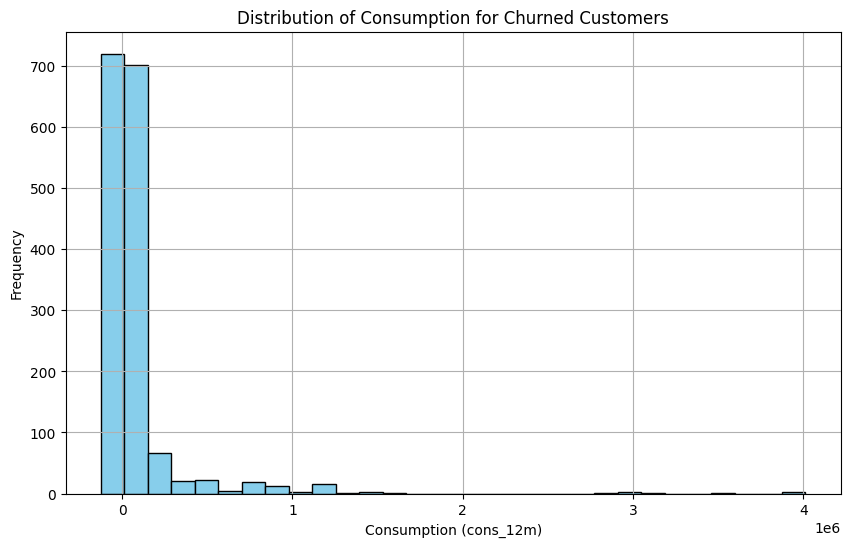

In [ ]:
import matplotlib.pyplot as plt

# Assuming churned_consumption is the Series containing consumption of churned customers
# Plot a histogram to visualize the distribution of consumption
plt.figure(figsize=(10, 6))
plt.hist(churned_consumption, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Consumption (cons_12m)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption for Churned Customers')
plt.grid(True)
plt.show()


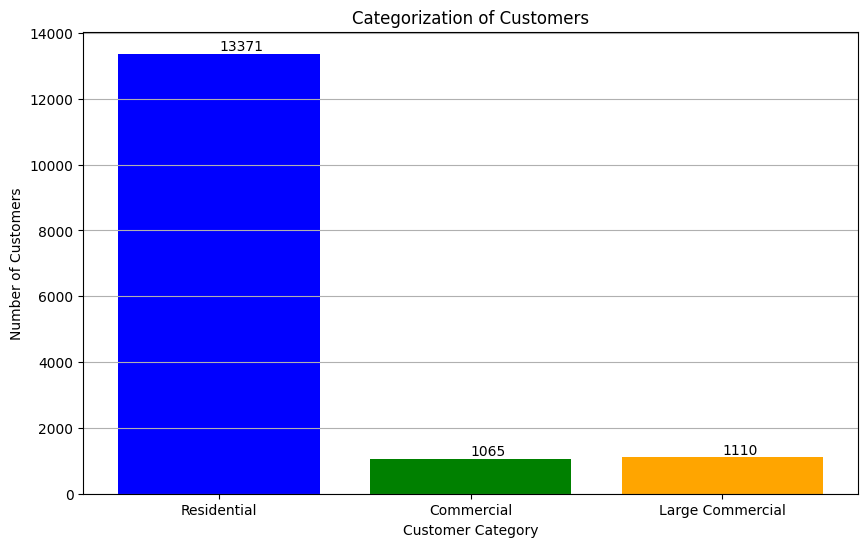

In [ ]:
import matplotlib.pyplot as plt

# Define consumption thresholds for each category
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Categorize customers based on consumption thresholds
residential_customers = analysis_df[analysis_df['cons_12m'] <= residential_threshold]
commercial_customers = analysis_df[(analysis_df['cons_12m'] > residential_threshold) & (analysis_df['cons_12m'] <= commercial_threshold)]
large_commercial_customers = analysis_df[(analysis_df['cons_12m'] > commercial_threshold) & (analysis_df['cons_12m'] <= large_commercial_threshold)]

# Get the count of customers in each category
residential_count = residential_customers.shape[0]
commercial_count = commercial_customers.shape[0]
large_commercial_count = large_commercial_customers.shape[0]

# Plot a bar graph for the categorization of customers based on consumption
categories = ['Residential', 'Commercial', 'Large Commercial']
counts = [residential_count, commercial_count, large_commercial_count]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.title('Categorization of Customers')
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


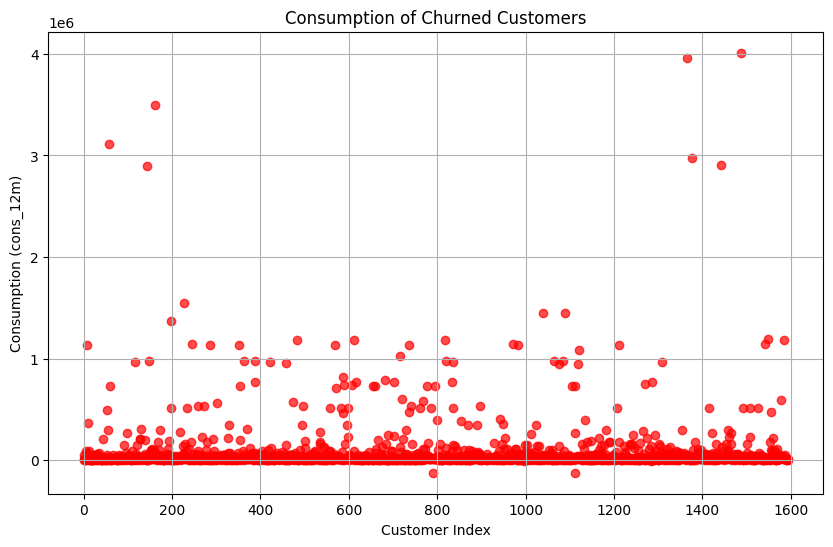

In [ ]:
# Assuming df is your DataFrame containing the data
# Assuming 'churn' is the column indicating churn status and 'cons_12m' is the consumption column

# Filter the DataFrame to include only churned customers (churn = 1)
churned_customers = analysis_df[analysis_df['churn'] == 1]

# Extract the 'cons_12m' column for churned customers
churned_consumptions = churned_customers['cons_12m']

# Plot the consumption of churned customers as a histogram
plt.figure(figsize=(10, 6))
plt.scatter(range(len(churned_consumptions)), churned_consumptions, color='red', alpha=0.7)
plt.xlabel('Customer Index')
plt.ylabel('Consumption (cons_12m)')
plt.title('Consumption of Churned Customers')
plt.grid(True)
plt.show()


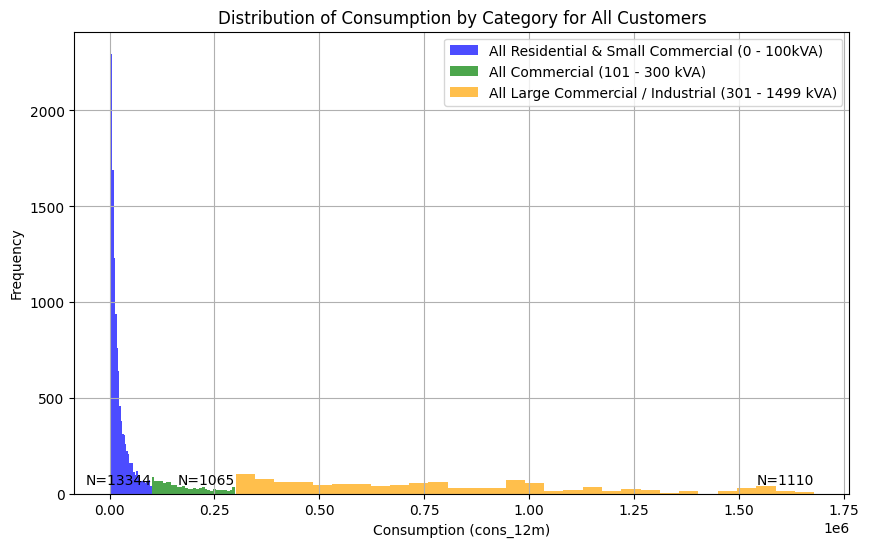

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Assuming 'cons_12m' is the column representing consumption

# Filter out negative consumption values
df_positive_consumption = analysis_df[analysis_df['cons_12m'] >= 0]

# Define thresholds for each category
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Categorize consumption into three categories based on thresholds for all customers
residential_consumption = df_positive_consumption[df_positive_consumption['cons_12m'] <= residential_threshold]
commercial_consumption = df_positive_consumption[(df_positive_consumption['cons_12m'] > residential_threshold) & (df_positive_consumption['cons_12m'] <= commercial_threshold)]
large_commercial_consumption = df_positive_consumption[(df_positive_consumption['cons_12m'] > commercial_threshold) & (df_positive_consumption['cons_12m'] <= large_commercial_threshold)]

# Plot the consumption for all customers in each category
plt.figure(figsize=(10, 6))
plt.hist(residential_consumption['cons_12m'], bins=30, color='blue', alpha=0.7, label='All Residential & Small Commercial (0 - 100kVA)')
plt.hist(commercial_consumption['cons_12m'], bins=30, color='green', alpha=0.7, label='All Commercial (101 - 300 kVA)')
plt.hist(large_commercial_consumption['cons_12m'], bins=30, color='orange', alpha=0.7, label='All Large Commercial / Industrial (301 - 1499 kVA)')
plt.xlabel('Consumption (cons_12m)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption by Category for All Customers')
plt.legend()

# Add annotations for the number of all customers in each category
plt.text(residential_consumption['cons_12m'].max(), 50, f'N={len(residential_consumption)}', ha='right')
plt.text(commercial_consumption['cons_12m'].max(), 50, f'N={len(commercial_consumption)}', ha='right')
plt.text(large_commercial_consumption['cons_12m'].max(), 50, f'N={len(large_commercial_consumption)}', ha='right')

plt.grid(True)
plt.show()

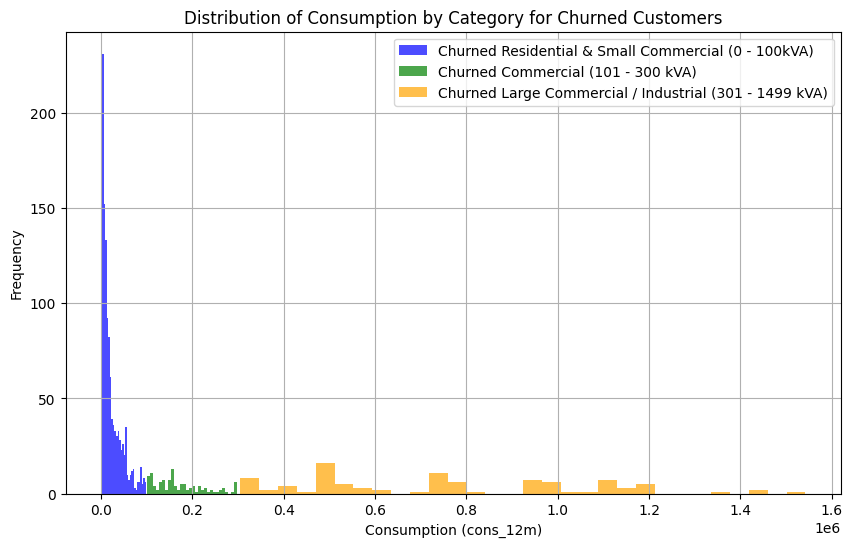

In [ ]:
# Assuming df is your DataFrame containing the data
# Assuming 'churn' is the column indicating churn status
# Assuming 'cons_12m' is the column representing consumption

# Filter the DataFrame to include only churned customers (churn = 1)
churned_customers = analysis_df[analysis_df['churn'] == 1]

# Filter out negative consumption values for churned customers
churned_positive_consumption = churned_customers[churned_customers['cons_12m'] >= 0]

# Define thresholds for each category
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Categorize consumption into three categories based on thresholds for churned customers
churned_residential_consumption = churned_positive_consumption[churned_positive_consumption['cons_12m'] <= residential_threshold]
churned_commercial_consumption = churned_positive_consumption[(churned_positive_consumption['cons_12m'] > residential_threshold) & (churned_positive_consumption['cons_12m'] <= commercial_threshold)]
churned_large_commercial_consumption = churned_positive_consumption[(churned_positive_consumption['cons_12m'] > commercial_threshold) & (churned_positive_consumption['cons_12m'] <= large_commercial_threshold)]

# Plot the consumption for churned customers in each category
plt.figure(figsize=(10, 6))
plt.hist(churned_residential_consumption['cons_12m'], bins=30, color='blue', alpha=0.7, label='Churned Residential & Small Commercial (0 - 100kVA)')
plt.hist(churned_commercial_consumption['cons_12m'], bins=30, color='green', alpha=0.7, label='Churned Commercial (101 - 300 kVA)')
plt.hist(churned_large_commercial_consumption['cons_12m'], bins=30, color='orange', alpha=0.7, label='Churned Large Commercial / Industrial (301 - 1499 kVA)')
plt.xlabel('Consumption (cons_12m)')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption by Category for Churned Customers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter out negative consumption values
df_positive_consumption = analysis_df[analysis_df['cons_12m'] >= 0]

# Count the number of total customers after excluding negative consumption values
total_customers = df_positive_consumption.shape[0]

# Print the number of total customers
print("Total number of customers after excluding negative consumption values:", total_customers)


Total number of customers after excluding negative consumption values: 16069


In [ ]:
# Filter out negative consumption values
df_positive_consumption = analysis_df[analysis_df['cons_12m'] >= 0]

# Define thresholds for each category
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Filter the DataFrame for each category
residential_customers = df_positive_consumption[df_positive_consumption['cons_12m'] <= residential_threshold]
commercial_customers = df_positive_consumption[(df_positive_consumption['cons_12m'] > residential_threshold) & (df_positive_consumption['cons_12m'] <= commercial_threshold)]
large_commercial_customers = df_positive_consumption[(df_positive_consumption['cons_12m'] > commercial_threshold) & (df_positive_consumption['cons_12m'] <= large_commercial_threshold)]

# Count the number of customers in each category
num_residential_customers = residential_customers.shape[0]
num_commercial_customers = commercial_customers.shape[0]
num_large_commercial_customers = large_commercial_customers.shape[0]

# Print the number of customers in each category
print("Number of customers in Residential & Small Commercial (0 - 100kVA) category:", num_residential_customers)
print("Number of customers in Commercial (101 - 300 kVA) category:", num_commercial_customers)
print("Number of customers in Large Commercial / Industrial (301 - 1499 kVA) category:", num_large_commercial_customers)


Number of customers in Residential & Small Commercial (0 - 100kVA) category: 13344
Number of customers in Commercial (101 - 300 kVA) category: 1065
Number of customers in Large Commercial / Industrial (301 - 1499 kVA) category: 1110


In [ ]:
# Assuming df is your DataFrame containing the data
# Assuming 'churn' is the column indicating churn status

# Filter the DataFrame to include only churned customers (churn = 1)
churned_customers = analysis_df[analysis_df['churn'] == 1]

# Get the number of churned customers
num_churned_customers = churned_customers.shape[0]

# Print the number of churned customers
print("Number of churned customers:", num_churned_customers)


Number of churned customers: 1595


In [ ]:
# Assuming churned_customers is your DataFrame containing churned customers
# Assuming 'cons_12m' is the column representing consumption

# Define consumption thresholds for each category
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Filter churned customers (churn = 1) into categories based on consumption thresholds
residential_customers = churned_customers[(churned_customers['cons_12m'] <= residential_threshold) & (churned_customers['churn'] == 1)]
commercial_customers = churned_customers[((churned_customers['cons_12m'] > residential_threshold) & (churned_customers['cons_12m'] <= commercial_threshold)) & (churned_customers['churn'] == 1)]
large_commercial_customers = churned_customers[(churned_customers['cons_12m'] > commercial_threshold) & (churned_customers['cons_12m'] <= large_commercial_threshold) & (churned_customers['churn'] == 1)]

# Print the number of churned customers in each category
print("Number of churned customers in Residential category:", len(residential_customers))
print("Number of churned customers in Commercial category:", len(commercial_customers))
print("Number of churned customers in Large Commercial category:", len(large_commercial_customers))


Number of churned customers in Residential category: 1380
Number of churned customers in Commercial category: 114
Number of churned customers in Large Commercial category: 94


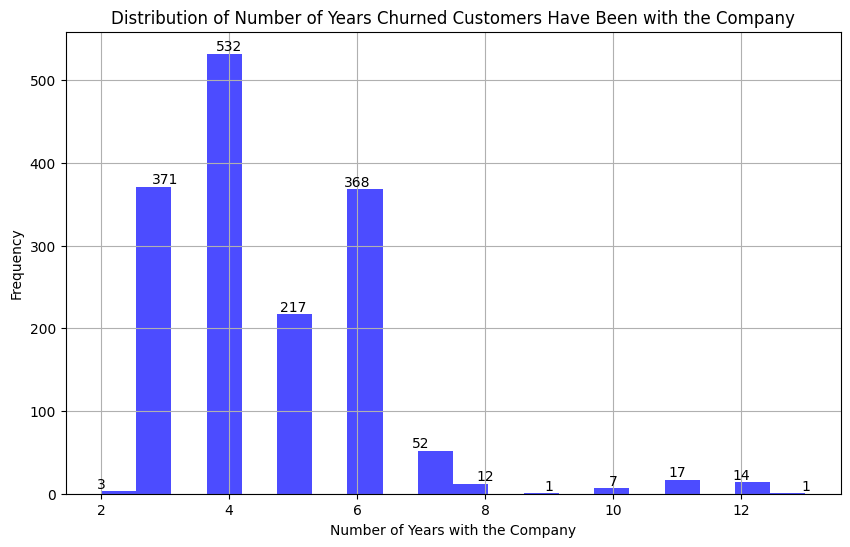

In [ ]:
# Assuming churned_customers is your DataFrame containing churned customers
# Assuming 'num_years_antig' is the column representing the number of years with the company

# Filter churned customers (where 'churn' equals 1)
churned_customers = churned_customers[churned_customers['churn'] == 1]

# Plot histogram of num_years_antig for churned customers
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['num_years_antig'], bins=20, color='blue', alpha=0.7)

# Add counts to each bar
for i, count in enumerate(churned_customers['num_years_antig'].value_counts()):
    plt.text(churned_customers['num_years_antig'].value_counts().index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Number of Years with the Company')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Years Churned Customers Have Been with the Company')
plt.grid(True)
plt.show()

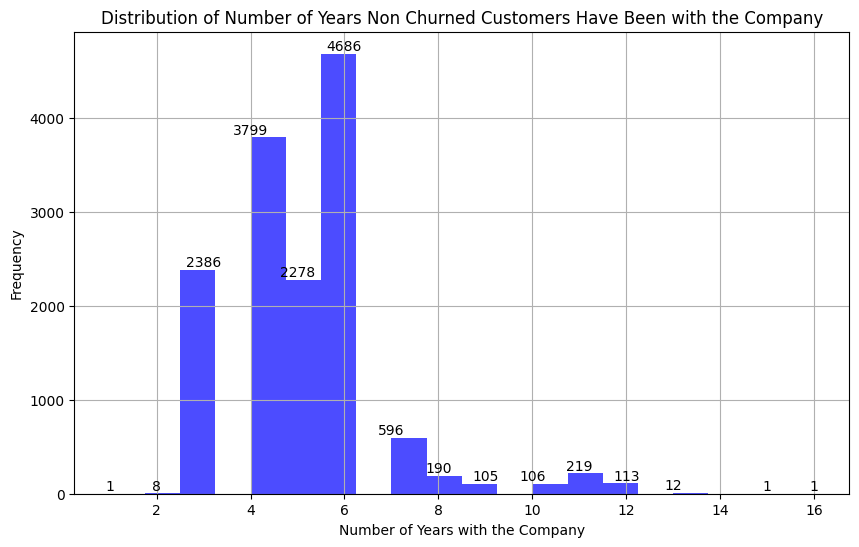

In [ ]:
# Assuming churned_customers is your DataFrame containing churned customers
# Assuming 'num_years_antig' is the column representing the number of years with the company

# Filter churned customers (where 'churn' equals 1)
non_churned_customers = analysis_df[analysis_df['churn'] == 0]

# Plot histogram of num_years_antig for churned customers
plt.figure(figsize=(10, 6))
plt.hist(non_churned_customers['num_years_antig'], bins=20, color='blue', alpha=0.7)

# Add counts to each bar
for i, count in enumerate(non_churned_customers['num_years_antig'].value_counts()):
    plt.text(non_churned_customers['num_years_antig'].value_counts().index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Number of Years with the Company')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Years Non Churned Customers Have Been with the Company')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average number of years with the company for non-churned customers
average_years_with_company = non_churned_customers['num_years_antig'].mean()

print("Average number of years non-churned customers have been with the company:", average_years_with_company)

Average number of years non-churned customers have been with the company: 5.070408937314668


In [ ]:
average_years_with_company = churned_customers['num_years_antig'].mean()

print("Average number of years churned customers have been with the company:", average_years_with_company)

Average number of years churned customers have been with the company: 4.6689655172413795


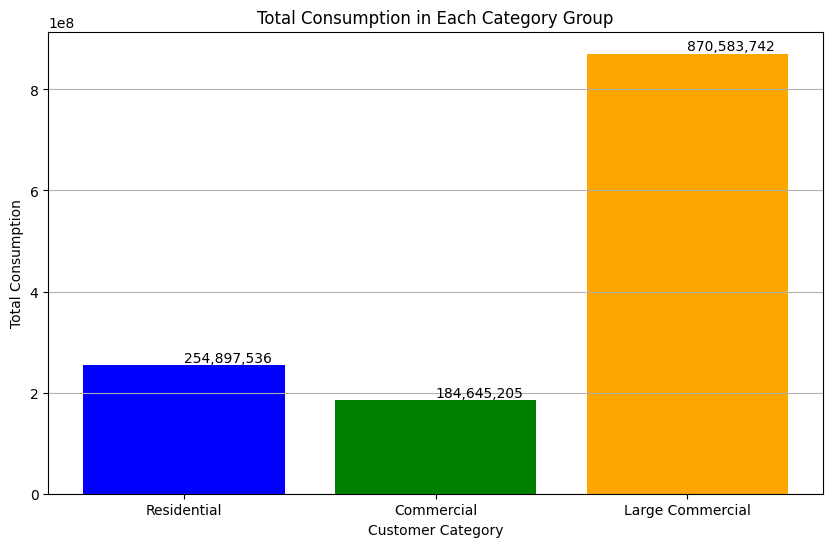

In [ ]:
import locale

# Set the locale to the user's default setting
locale.setlocale(locale.LC_ALL, '')

# Assuming df is your DataFrame containing the data
# Assuming 'total_consumption' is the column representing the total consumption
# Assuming 'customer_category' is the column representing the category of customers
# Assuming residential_threshold, commercial_threshold, and large_commercial_threshold are defined thresholds

residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Filter customers into categories based on consumption thresholds
residential_customers = analysis_df[analysis_df['cons_12m'] <= residential_threshold]
commercial_customers = analysis_df[(analysis_df['cons_12m'] > residential_threshold) & (analysis_df['cons_12m'] <= commercial_threshold)]
large_commercial_customers = analysis_df[(analysis_df['cons_12m'] > commercial_threshold) & (analysis_df['cons_12m'] <= large_commercial_threshold)]

# Calculate total consumption for each category group
residential_consumption = residential_customers['cons_12m'].sum()
commercial_consumption = commercial_customers['cons_12m'].sum()
large_commercial_consumption = large_commercial_customers['cons_12m'].sum()

# Plot a bar graph for the total consumption in each category group
plt.figure(figsize=(10, 6))
bars = plt.bar(['Residential', 'Commercial', 'Large Commercial'], [residential_consumption, commercial_consumption, large_commercial_consumption], color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Total Consumption')
plt.title('Total Consumption in Each Category Group')
plt.grid(axis='y')

# Add values on top of each bar with thousand separators
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, locale.format_string('%d', yval, grouping=True), va='bottom')

plt.show()


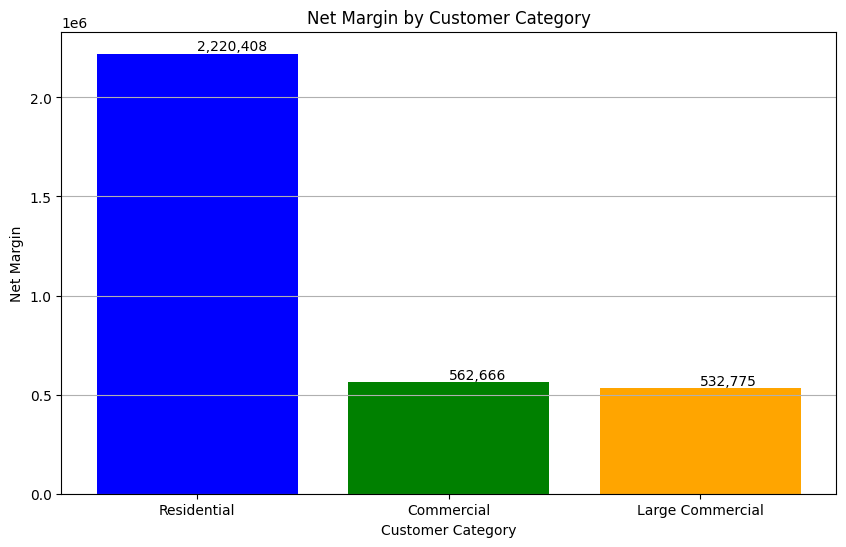

In [ ]:
residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Categorize customers into groups based on the given thresholds
residential_customers = analysis_df[analysis_df['cons_12m'] <= residential_threshold]
commercial_customers = analysis_df[(analysis_df['cons_12m'] > residential_threshold) & (analysis_df['cons_12m'] <= commercial_threshold)]
large_commercial_customers = analysis_df[(analysis_df['cons_12m'] > commercial_threshold) & (analysis_df['cons_12m'] <= large_commercial_threshold)]

# Calculate the net margin for each category group
residential_net_margin = residential_customers['net_margin'].sum()
commercial_net_margin = commercial_customers['net_margin'].sum()
large_commercial_net_margin = large_commercial_customers['net_margin'].sum()

# Plot a bar graph for the net margin in each category group
plt.figure(figsize=(10, 6))
bars = plt.bar(['Residential', 'Commercial', 'Large Commercial'], [residential_net_margin, commercial_net_margin, large_commercial_net_margin], color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Net Margin')
plt.title('Net Margin by Customer Category')
plt.grid(axis='y')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, locale.format_string('%d', yval, grouping=True), va='bottom')

plt.show()


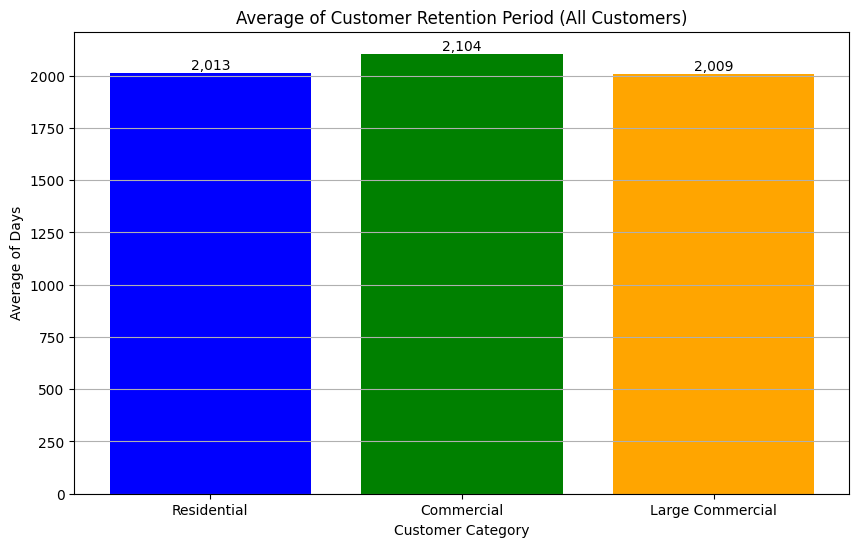

In [ ]:
import matplotlib.pyplot as plt

# Assuming analysis_df is your DataFrame containing the data
# Assuming residential_threshold, commercial_threshold, and large_commercial_threshold are defined thresholds

# Convert 'date_end' and 'date_activ' columns to datetime objects
analysis_df['date_end'] = pd.to_datetime(analysis_df['date_end'])
analysis_df['date_activ'] = pd.to_datetime(analysis_df['date_activ'])

# Calculate CLV for each customer based on the difference between 'date_end' and 'date_activ'
analysis_df['CLV'] = (analysis_df['date_end'] - analysis_df['date_activ']).dt.days

# Convert CLV to integers
analysis_df['CLV'] = analysis_df['CLV'].round().astype(int)

# Categorize customers into groups based on consumption thresholds
residential_customers = analysis_df[analysis_df['cons_12m'] <= residential_threshold]
commercial_customers = analysis_df[(analysis_df['cons_12m'] > residential_threshold) & (analysis_df['cons_12m'] <= commercial_threshold)]
large_commercial_customers = analysis_df[(analysis_df['cons_12m'] > commercial_threshold) & (analysis_df['cons_12m'] <= large_commercial_threshold)]

# Calculate the average CLV for each category group
residential_clv_avg = residential_customers['CLV'].sum() / len(residential_customers)
commercial_clv_avg = commercial_customers['CLV'].sum() / len(commercial_customers)
large_commercial_clv_avg = large_commercial_customers['CLV'].sum() / len(large_commercial_customers)

# Plot a bar graph for the average CLV in each category group
plt.figure(figsize=(10, 6))
bars = plt.bar(['Residential', 'Commercial', 'Large Commercial'], [residential_clv_avg, commercial_clv_avg, large_commercial_clv_avg], color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Average of Days')
plt.title('Average of Customer Retention Period (All Customers)')
plt.grid(axis='y')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.show()


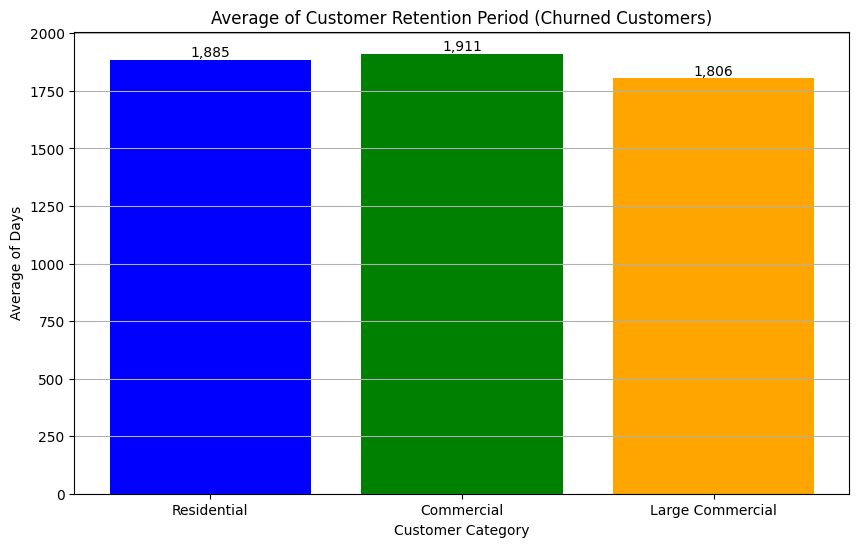

In [ ]:
import matplotlib.pyplot as plt

# Assuming analysis_df is your DataFrame containing the data
# Assuming residential_threshold, commercial_threshold, and large_commercial_threshold are defined thresholds

# Convert 'date_end' and 'date_activ' columns to datetime objects
analysis_df['date_end'] = pd.to_datetime(analysis_df['date_end'])
analysis_df['date_activ'] = pd.to_datetime(analysis_df['date_activ'])

# Calculate CLV for each customer based on the difference between 'date_end' and 'date_activ'
analysis_df['CLV'] = (analysis_df['date_end'] - analysis_df['date_activ']).dt.days

# Convert CLV to integers
analysis_df['CLV'] = analysis_df['CLV'].round().astype(int)

# Filter churned customers (where churn == 1)
churned_customers = analysis_df[analysis_df['churn'] == 1]

# Categorize churned customers into groups based on consumption thresholds
residential_customers = churned_customers[churned_customers['cons_12m'] <= residential_threshold]
commercial_customers = churned_customers[(churned_customers['cons_12m'] > residential_threshold) & (churned_customers['cons_12m'] <= commercial_threshold)]
large_commercial_customers = churned_customers[(churned_customers['cons_12m'] > commercial_threshold) & (churned_customers['cons_12m'] <= large_commercial_threshold)]

# Calculate the sum of CLV for each category group
residential_clv_avg = residential_customers['CLV'].sum() / len(residential_customers)
commercial_clv_avg = commercial_customers['CLV'].sum() / len(commercial_customers)
large_commercial_clv_avg = large_commercial_customers['CLV'].sum() / len(large_commercial_customers)

# Plot a bar graph for the sum of CLV in each category group
plt.figure(figsize=(10, 6))
bars = plt.bar(['Residential', 'Commercial', 'Large Commercial'], [residential_clv_sum, commercial_clv_sum, large_commercial_clv_sum], color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Average of Days')
plt.title('Average of Customer Retention Period (Churned Customers)')
plt.grid(axis='y')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.show()


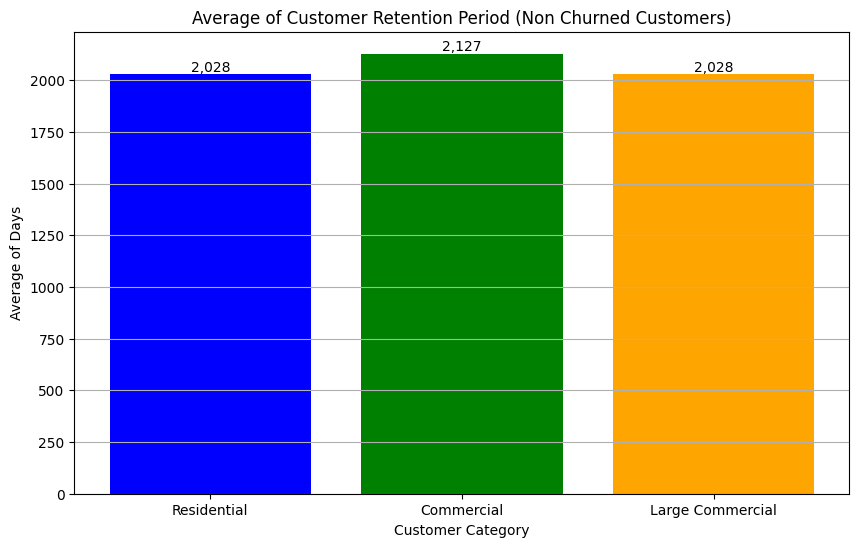

In [ ]:
import matplotlib.pyplot as plt

residential_threshold = 100000
commercial_threshold = 300000
large_commercial_threshold = 1700000

# Assuming analysis_df is your DataFrame containing the data
# Assuming residential_threshold, commercial_threshold, and large_commercial_threshold are defined thresholds

# Convert 'date_end' and 'date_activ' columns to datetime objects
analysis_df['date_end'] = pd.to_datetime(analysis_df['date_end'])
analysis_df['date_activ'] = pd.to_datetime(analysis_df['date_activ'])

# Calculate CLV for each customer based on the difference between 'date_end' and 'date_activ'
analysis_df['CLV'] = (analysis_df['date_end'] - analysis_df['date_activ']).dt.days

# Convert CLV to integers
analysis_df['CLV'] = analysis_df['CLV'].round().astype(int)

# Filter churned customers (where churn == 1)
churned_customers = analysis_df[analysis_df['churn'] == 0]

# Categorize churned customers into groups based on consumption thresholds
residential_customers = churned_customers[churned_customers['cons_12m'] <= residential_threshold]
commercial_customers = churned_customers[(churned_customers['cons_12m'] > residential_threshold) & (churned_customers['cons_12m'] <= commercial_threshold)]
large_commercial_customers = churned_customers[(churned_customers['cons_12m'] > commercial_threshold) & (churned_customers['cons_12m'] <= large_commercial_threshold)]

# Calculate the sum of CLV for each category group
residential_clv_avg = residential_customers['CLV'].sum() / len(residential_customers)
commercial_clv_avg = commercial_customers['CLV'].sum() / len(commercial_customers)
large_commercial_clv_avg = large_commercial_customers['CLV'].sum() / len(large_commercial_customers)

# Plot a bar graph for the sum of CLV in each category group
plt.figure(figsize=(10, 6))
bars = plt.bar(['Residential', 'Commercial', 'Large Commercial'], [residential_clv_avg, commercial_clv_avg, large_commercial_clv_avg], color=['blue', 'green', 'orange'])
plt.xlabel('Customer Category')
plt.ylabel('Average of Days')
plt.title('Average of Customer Retention Period (Non Churned Customers)')
plt.grid(axis='y')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.show()


# Preparation for Model Training

In [ ]:
model_df = analysis_df.reset_index()

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     16096 non-null  int64  
 1   id                        16096 non-null  object 
 2   cons_12m                  16096 non-null  int64  
 3   cons_gas_12m              16096 non-null  int64  
 4   cons_last_month           16096 non-null  int64  
 5   date_activ                16096 non-null  object 
 6   date_end                  16096 non-null  object 
 7   date_modif_prod           16096 non-null  object 
 8   date_renewal              16096 non-null  object 
 9   forecast_cons_12m         16096 non-null  float64
 10  forecast_cons_year        16096 non-null  int64  
 11  forecast_discount_energy  16096 non-null  float64
 12  forecast_meter_rent_12m   16096 non-null  float64
 13  forecast_price_energy_p1  16096 non-null  float64
 14  foreca

In [ ]:
print(model_df.columns.tolist())

['index', 'id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']


Feature Engineering :

* Feature Selection
* Feature Scaling
* Data Balancing

In [ ]:
x = model_df[['cons_12m', 'cons_gas_12m',
             'cons_last_month', 'forecast_cons_12m',
             'forecast_cons_year', 'forecast_discount_energy',
             'forecast_meter_rent_12m', 'forecast_price_energy_p1',
             'forecast_price_energy_p2', 'forecast_price_pow_p1',
             'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
             'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']]


y = model_df['churn']

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# 1. Feature Scaling - StandardScaler

In [ ]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fit logistic regression to the training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3591    6]
 [ 426    1]]


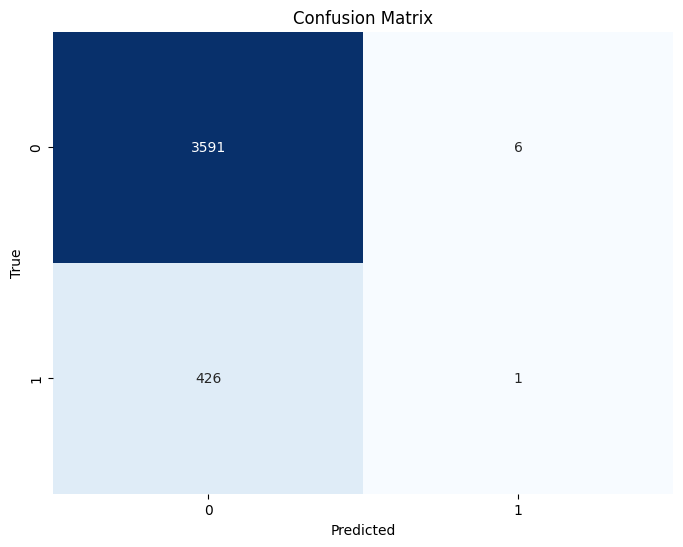

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3597
           1       0.14      0.00      0.00       427

    accuracy                           0.89      4024
   macro avg       0.52      0.50      0.47      4024
weighted avg       0.81      0.89      0.84      4024



# 2. Data Balancing - SMOTE

Before SMOTE:  Counter({0: 10904, 1: 1168})
After SMOTE:  Counter({0: 10904, 1: 10904})


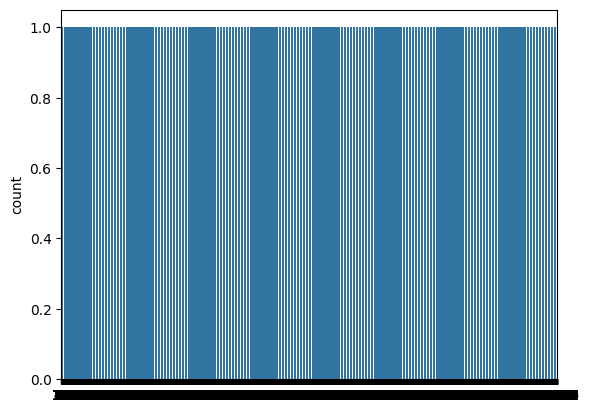

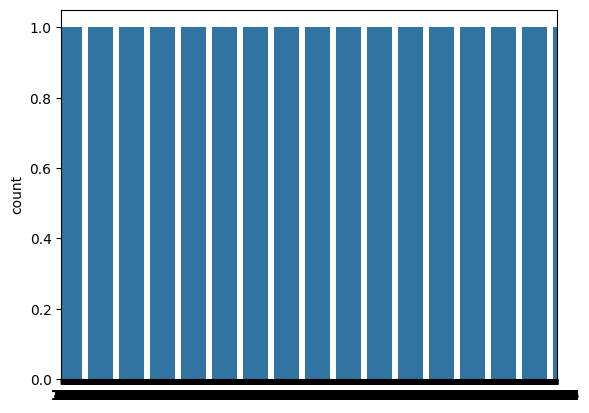

In [ ]:
!pip install imblearn --quiet
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#SMOTE instance initialized
smote=SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

# y_train after applied SMOTE
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

ax = sns.countplot(y_train)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

ax = sns.countplot(y_train_smote)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

# 3. XGBoost, Logistic Regression, Random Forest

In [ ]:
#Fitting XGBoost without handling Target class immbalance
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
                                      colsample_bynode=1, colsample_bytree=0.2,
                                      enable_categorical=False, gamma=10, gpu_id=-1,
                                      importance_type=None, interaction_constraints='',
                                      learning_rate=0.4, max_delta_step=0, max_depth=12,
                                      min_child_weight=1, monotone_constraints='()',
                                      n_estimators=620, n_jobs=16, num_parallel_tree=1,
                                      predictor='auto', random_state=0, reg_alpha=51.2, reg_lambda=3.2,
                                      scale_pos_weight=1, subsample=1,
                                      tree_method='exact', validate_parameters=1, verbosity=None).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:34:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Train the classifier on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = log_reg.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# 4. Performance Metrics : Recall, Accuracy, Precision

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
# XGB Performance Metrics

#Calculate Recall, Accuracy, Precision
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

#Training data performance
print("Accuracy score on Training data:",accuracy_score(y_train,y_pred_train))
print("Recall score on Training data:",recall_score(y_train, y_pred_train, average='weighted'))
print("Precision score on Training data:",precision_score(y_train,y_pred_train, average='weighted'))

#Testing data performance
print('\n')
print("Accuracy score on Testing data:",accuracy_score(y_test,y_pred_test))
print("Recall score on Training data:",recall_score(y_test, y_pred_test, average='weighted'))
print("Precision score on Training data:",precision_score(y_test, y_pred_test, average='weighted'))

print('\n')
print(classification_report(y_test,y_pred_test))

pd.crosstab(y_test,y_pred_test)

Accuracy score on Training data: 0.903247183565275
Recall score on Training data: 0.903247183565275
Precision score on Training data: 0.8158554746186015


Accuracy score on Testing data: 0.8938866799204771
Recall score on Training data: 0.8938866799204771
Precision score on Training data: 0.7990333965392535


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3597
           1       0.00      0.00      0.00       427

    accuracy                           0.89      4024
   macro avg       0.45      0.50      0.47      4024
weighted avg       0.80      0.89      0.84      4024



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined

col_0,0
churn,
0,3597
1,427


In [ ]:
# Logistic Regression Performance Metrics


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.8926441351888668
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3597
           1       0.14      0.00      0.00       427

    accuracy                           0.89      4024
   macro avg       0.52      0.50      0.47      4024
weighted avg       0.81      0.89      0.84      4024

Confusion Matrix:
[[3591    6]
 [ 426    1]]


In [ ]:
# Random Forest Performance Metrics

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8968687872763419
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3597
           1       0.93      0.03      0.06       427

    accuracy                           0.90      4024
   macro avg       0.91      0.52      0.50      4024
weighted avg       0.90      0.90      0.85      4024

Confusion Matrix:
[[3596    1]
 [ 414   13]]


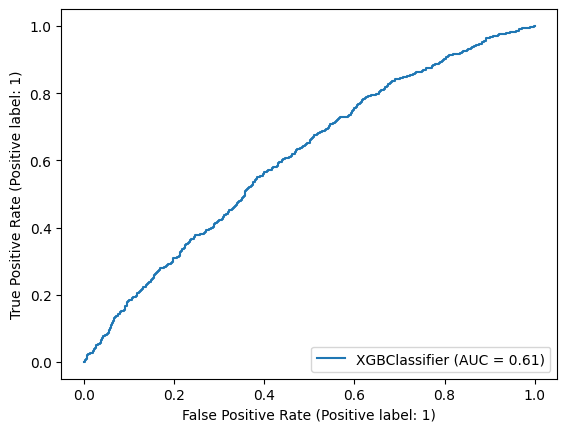

In [ ]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(xgb, X_test, y_test);

In [ ]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test);

NameError: name 'rf_classifier' is not defined

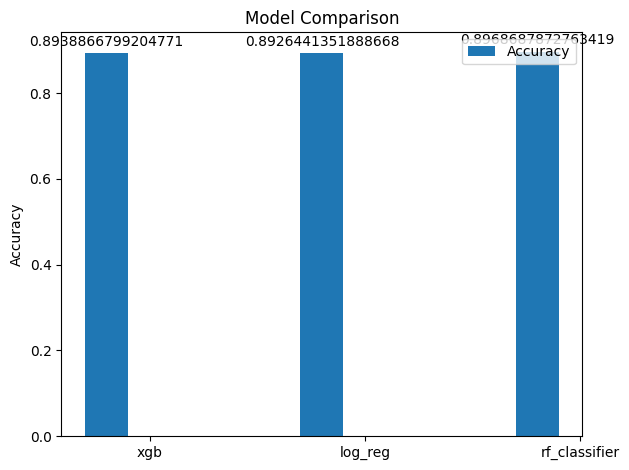

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example evaluation metrics for three models
models = ['xgb', 'log_reg', 'rf_classifier']

# Compute accuracy for each model (replace with your actual code)
accuracy_model_1 = accuracy_score(y_test, y_pred_test)
accuracy_model_2 = accuracy_score(y_test, y_pred_lr)
accuracy_model_3 = accuracy_score(y_test, y_pred_rf)

accuracy = [accuracy_model_1, accuracy_model_2, accuracy_model_3]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Auto-label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()


In [ ]:
# import pandas as pd

# # Replace non-numeric values with NaN
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# # Drop rows with NaN
# X_train = X_train.dropna()
# X_test = X_test.dropna()

# 5. Feature Importances Visualization

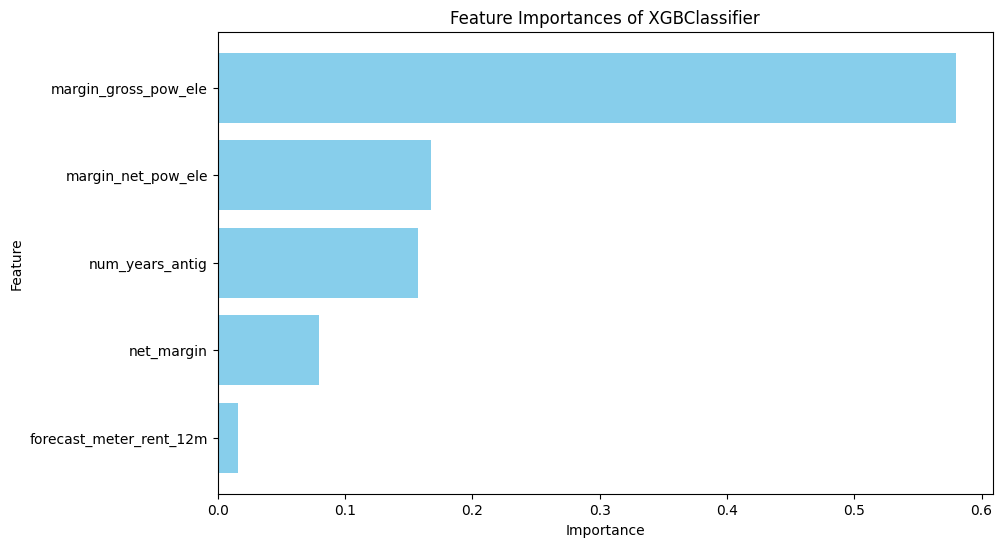

In [ ]:
# xgb Feature Importances

feature_importances = xgb.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of XGBClassifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

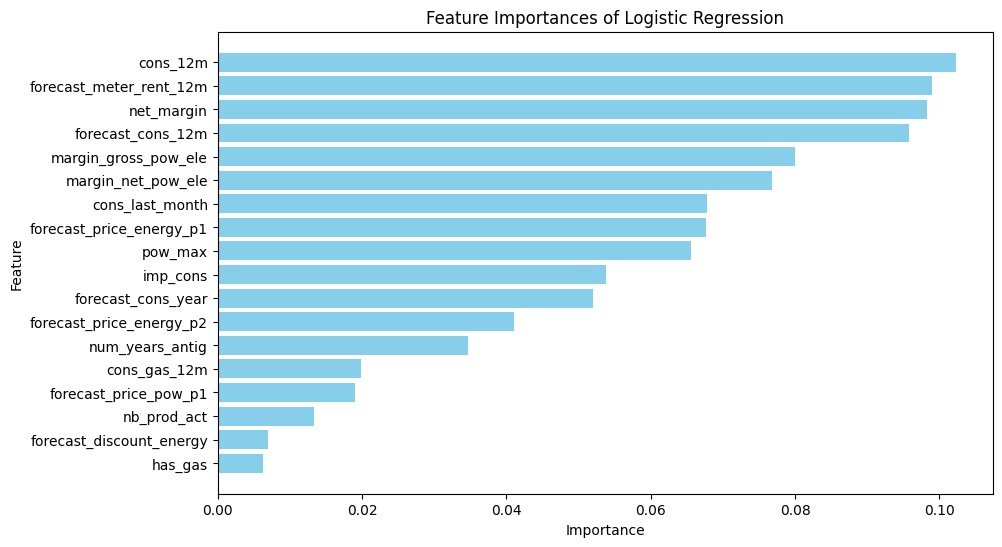

In [ ]:
feature_importances = log_reg.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

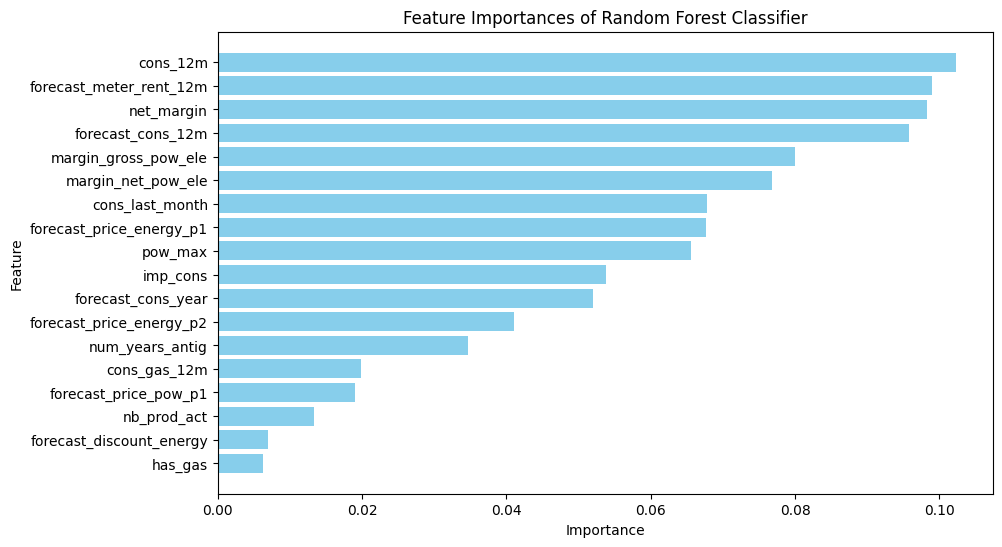

In [ ]:
# rf_classifier Feature Importances

feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()